### Visualización

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df_combinado = pd.read_csv('ds_combinado.csv')

In [6]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126690 entries, 0 to 126689
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Date                      126690 non-null  object 
 1   Corte_hoja                126690 non-null  float64
 2   Grado                     126690 non-null  object 
 3   Velocidad_pope            126690 non-null  float64
 4   Gramaje_cara              126690 non-null  float64
 5   Gramaje_Reverso           126690 non-null  float64
 6   Gramaje_Tripa             126690 non-null  float64
 7   Gramaje_prote             126690 non-null  float64
 8   Caudal_cara               126690 non-null  float64
 9   Caudal_Prote              126690 non-null  float64
 10  Caudal_Reverso            126690 non-null  float64
 11  Caudal_Tripa              126690 non-null  float64
 12  secado_1                  126690 non-null  float64
 13  secado_2                  126690 non-null  f

In [7]:
df_combinado['Date']

0         2024-05-01 00:00:00
1         2024-05-01 00:01:00
2         2024-05-01 00:02:00
3         2024-05-01 00:03:00
4         2024-05-01 00:04:00
                 ...         
126685    2024-07-31 23:56:00
126686    2024-07-31 23:57:00
126687    2024-07-31 23:58:00
126688    2024-07-31 23:59:00
126689    2024-08-01 00:00:00
Name: Date, Length: 126690, dtype: object

In [8]:
df_combinado['Date'] = pd.to_datetime(df_combinado['Date'], format='%Y-%m-%d %H:%M:%S')

In [9]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126690 entries, 0 to 126689
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Date                      126690 non-null  datetime64[ns]
 1   Corte_hoja                126690 non-null  float64       
 2   Grado                     126690 non-null  object        
 3   Velocidad_pope            126690 non-null  float64       
 4   Gramaje_cara              126690 non-null  float64       
 5   Gramaje_Reverso           126690 non-null  float64       
 6   Gramaje_Tripa             126690 non-null  float64       
 7   Gramaje_prote             126690 non-null  float64       
 8   Caudal_cara               126690 non-null  float64       
 9   Caudal_Prote              126690 non-null  float64       
 10  Caudal_Reverso            126690 non-null  float64       
 11  Caudal_Tripa              126690 non-null  float64       
 12  se

### la variable 'Gramaje_pope' es el gramaje de la hoja de papel fabricado. Se mide en g/m², y es una variable crítica que interesa controlar

#### visualización del gramaje pope en el tiempo

Se observa un comportamieto ciclico que puede ser explicado por los distindos grados de fabricación

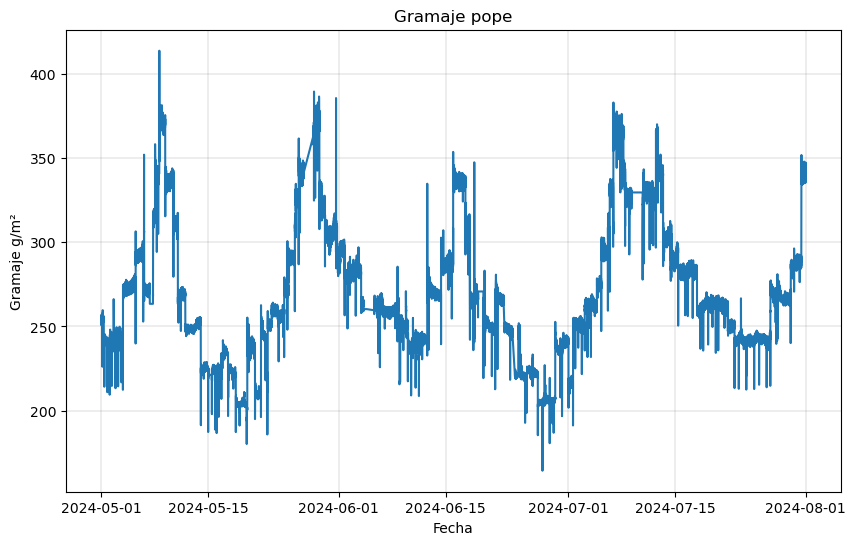

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(df_combinado['Date'], df_combinado['Gramaje_pope'])
plt.grid(True, linewidth=0.2, color='gray')
plt.title('Gramaje pope')
plt.xlabel('Fecha')
plt.ylabel('Gramaje g/m²')
plt.show()

#### Me interesa ver como se distribuye el gramaje promedio por grado

In [14]:
grado_gramaje_mean = df_combinado.groupby('Grado')['Gramaje_pope'].mean().reset_index()

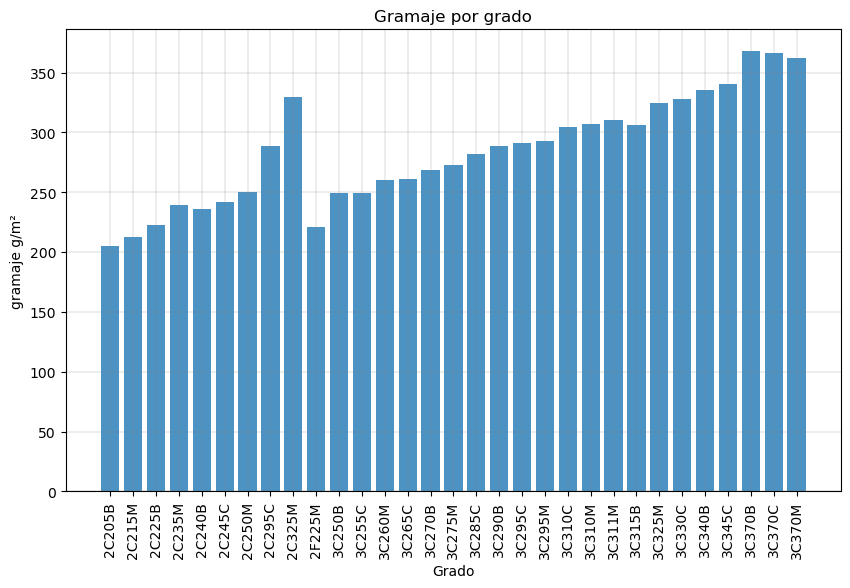

In [15]:
plt.figure(figsize=(10,6))
plt.bar(grado_gramaje_mean['Grado'], grado_gramaje_mean['Gramaje_pope'], alpha=0.8)
plt.grid(True, linewidth=0.2, color='gray')
plt.title('Gramaje por grado')
plt.xlabel('Grado')
plt.ylabel('gramaje g/m²')
plt.xticks(rotation=90)
plt.show()

#### Interesa eliminar los valores donde 'Corte_hoja' es igual a 0. Esto indica que se está producciendo de forma normal.

In [17]:
df_combinado_pro = df_combinado[df_combinado['Corte_hoja']==0]

In [18]:
df_combinado_pro.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113917 entries, 0 to 126689
Data columns (total 42 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Date                      113917 non-null  datetime64[ns]
 1   Corte_hoja                113917 non-null  float64       
 2   Grado                     113917 non-null  object        
 3   Velocidad_pope            113917 non-null  float64       
 4   Gramaje_cara              113917 non-null  float64       
 5   Gramaje_Reverso           113917 non-null  float64       
 6   Gramaje_Tripa             113917 non-null  float64       
 7   Gramaje_prote             113917 non-null  float64       
 8   Caudal_cara               113917 non-null  float64       
 9   Caudal_Prote              113917 non-null  float64       
 10  Caudal_Reverso            113917 non-null  float64       
 11  Caudal_Tripa              113917 non-null  float64       
 12  secado_

In [19]:
df_combinado_pro.describe()

,Date,Corte_hoja,Velocidad_pope,Gramaje_cara,Gramaje_Reverso,Gramaje_Tripa,Gramaje_prote,Caudal_cara,Caudal_Prote,Caudal_Reverso,...,Rigidez_Long,Rigidez_Transv,Scott_Bond,Blancura_Cara,Cobb_Cara,Cobb_Cara_Base,Cobb_Tripa,Lisura_PPS,Tersura_Sheffield,Blistering_Cara
count,113917,113917.0,113917.000000,113917.000000,113917.000000,113917.000000,113917.000000,113917.000000,113917.000000,113917.000000,...,113917.000000,113917.000000,113917.000000,113917.000000,113917.000000,113917.000000,113917.000000,113917.000000,113917.000000,113917.000000
mean,2024-06-16 12:44:08.912278016,0.0,691.819033,25.823887,138.231569,29.418800,26.162334,31485.888173,26874.642135,31129.909605,...,24.264621,8.235355,165.899090,84.390428,0.363365,0.603489,0.369717,1.301963,45.602702,75.492488
min,2024-05-01 00:00:00,0.0,429.004303,21.400303,69.281342,0.010638,19.210241,0.000000,24187.085938,27092.873047,...,6.400000,2.200000,76.199997,70.099998,0.280000,0.310000,0.240000,0.910000,0.000000,38.799999
25%,2024-05-23 09:32:00,0.0,650.571411,24.572485,113.592339,28.184082,24.632750,31254.679688,26261.691406,30343.373047,...,17.100000,5.700000,145.300003,81.599998,0.350000,0.480000,0.330000,1.220000,31.000000,69.800003
50%,2024-06-16 20:24:00,0.0,703.876343,25.799561,133.996094,29.337236,25.843359,31494.759766,26721.916016,31013.820312,...,21.600000,7.400000,169.100006,84.599998,0.360000,0.550000,0.360000,1.300000,45.000000,75.400002
75%,2024-07-10 22:11:00,0.0,764.905945,26.652832,155.419647,30.265181,28.297195,31788.873047,27657.529297,31952.769531,...,30.500000,9.700000,185.199997,87.099998,0.380000,0.670000,0.400000,1.380000,60.000000,80.599998
max,2024-08-01 00:00:00,0.0,826.417358,35.013672,253.639069,38.852539,38.234085,34496.632812,29480.914062,37356.953125,...,62.700001,21.400000,485.299988,89.099998,0.610000,1.330000,0.860000,2.920000,205.000000,100.000000
std,NaN,0.0,96.609686,1.743389,33.770464,1.741236,2.511401,730.721440,910.158364,1148.737230,...,11.105910,3.809380,27.905146,2.784934,0.029695,0.182878,0.063639,0.118731,20.714078,7.447744


In [20]:
grado_gramaje_mean_pr = df_combinado_pro.groupby('Grado')['Gramaje_pope'].mean().reset_index()

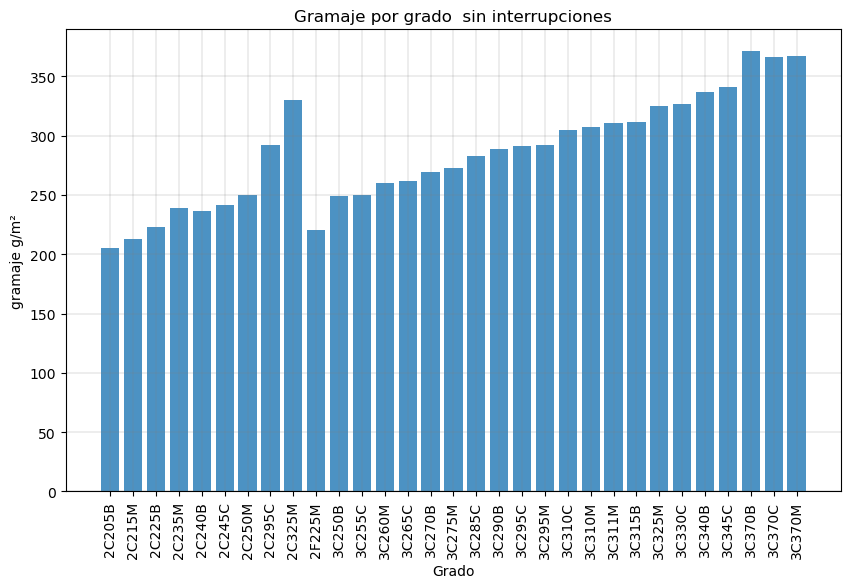

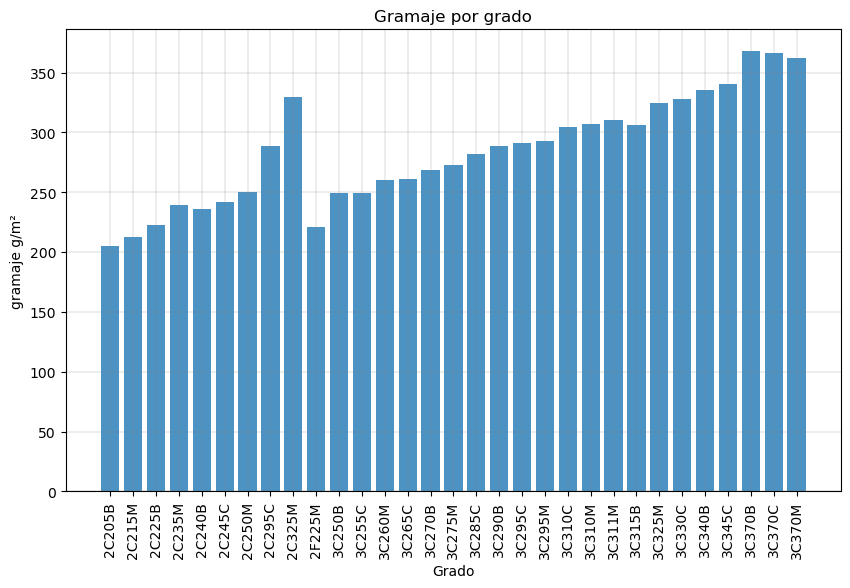

In [21]:
plt.figure(figsize=(10,6))
plt.bar(grado_gramaje_mean_pr['Grado'], grado_gramaje_mean_pr['Gramaje_pope'], alpha=0.8)
plt.grid(True, linewidth=0.2, color='gray')
plt.title('Gramaje por grado  sin interrupciones')
plt.xlabel('Grado')
plt.ylabel('gramaje g/m²')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,6))
plt.bar(grado_gramaje_mean['Grado'], grado_gramaje_mean['Gramaje_pope'], alpha=0.8)
plt.grid(True, linewidth=0.2, color='gray')
plt.title('Gramaje por grado')
plt.xlabel('Grado')
plt.ylabel('gramaje g/m²')
plt.xticks(rotation=90)
plt.show()

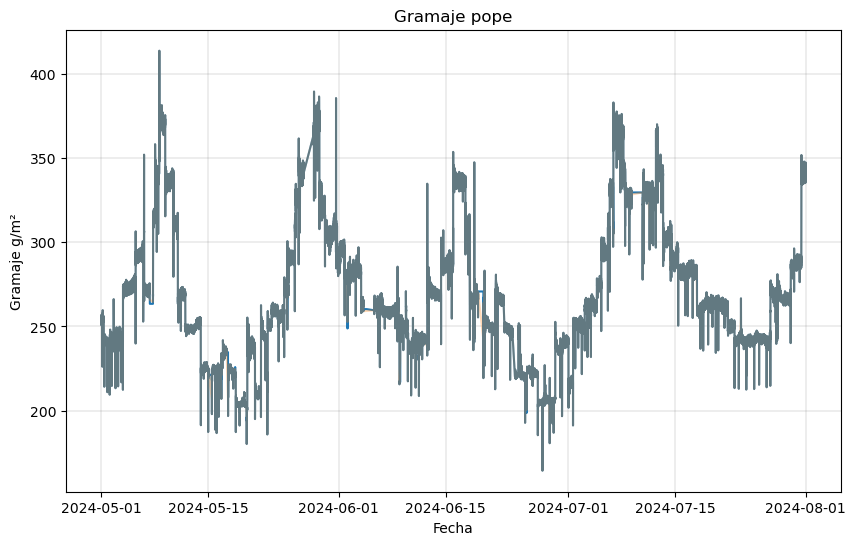

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(df_combinado['Date'], df_combinado['Gramaje_pope'])
plt.plot(df_combinado_pro['Date'], df_combinado_pro['Gramaje_pope'], alpha=0.3)
plt.grid(True, linewidth=0.2, color='gray')
plt.title('Gramaje pope')
plt.xlabel('Fecha')
plt.ylabel('Gramaje g/m²')
plt.show()

#### No se aprecia gran diferencia de los datos en producción y detenido, lo que no tiene senbtido porque detenido se se sestá produciendo
#### Exploremos que pasa con los valores cuando no se está produciendo. Creamos un nuevo dataframe par acuanedo no de está produciendo ('Corte_hoja' != 0)

In [24]:
df_combinado_corte = df_combinado[df_combinado['Corte_hoja'] != 0]

In [25]:
df_combinado_corte.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12773 entries, 1296 to 124506
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      12773 non-null  datetime64[ns]
 1   Corte_hoja                12773 non-null  float64       
 2   Grado                     12773 non-null  object        
 3   Velocidad_pope            12773 non-null  float64       
 4   Gramaje_cara              12773 non-null  float64       
 5   Gramaje_Reverso           12773 non-null  float64       
 6   Gramaje_Tripa             12773 non-null  float64       
 7   Gramaje_prote             12773 non-null  float64       
 8   Caudal_cara               12773 non-null  float64       
 9   Caudal_Prote              12773 non-null  float64       
 10  Caudal_Reverso            12773 non-null  float64       
 11  Caudal_Tripa              12773 non-null  float64       
 12  secado_1           

#### hay 12773 entradas cuando no se está produciendo. Es un 1% del total. Es posible que por esto no son significativos.
#### Cuando se está en corte de hoja la porducción está detenida, por lo que los valores en corte de hoja no son consistentes
#### Los valores en corte de hoja se sacan del análisis

In [27]:
df_combinado_corte.describe()

,Date,Corte_hoja,Velocidad_pope,Gramaje_cara,Gramaje_Reverso,Gramaje_Tripa,Gramaje_prote,Caudal_cara,Caudal_Prote,Caudal_Reverso,...,Rigidez_Long,Rigidez_Transv,Scott_Bond,Blancura_Cara,Cobb_Cara,Cobb_Cara_Base,Cobb_Tripa,Lisura_PPS,Tersura_Sheffield,Blistering_Cara
count,12773,12773.000000,12773.000000,1.277300e+04,1.277300e+04,1.277300e+04,1.277300e+04,12773.000000,12773.000000,12773.000000,...,12773.000000,12773.000000,12773.000000,12773.000000,12773.000000,12773.000000,12773.000000,12773.000000,12773.000000,12773.000000
mean,2024-06-11 04:56:08.333202688,16.366640,372.231859,1.818773e+18,1.819782e+18,1.805143e+18,-2.206820e+17,18852.894077,17501.343988,20320.696518,...,25.368003,8.641423,161.407892,84.534722,0.371577,0.533774,0.358647,1.335071,42.805058,72.768590
min,2024-05-01 21:36:00,0.612245,-15.347968,0.000000e+00,-1.419553e-02,-9.223231e+18,-9.223231e+18,0.000000,0.000000,0.000000,...,7.000000,2.500000,76.199997,72.300003,0.290000,0.310000,0.260000,0.990000,0.000000,57.799999
25%,2024-05-16 21:15:00,10.000000,0.000000,0.000000e+00,0.000000e+00,4.224955e-02,2.218796e-03,0.000000,0.000000,0.000000,...,16.400000,5.500000,128.800003,81.800003,0.340000,0.440000,0.320000,1.240000,27.000000,65.599998
50%,2024-06-11 21:29:00,10.000000,451.489960,2.504898e+01,1.073496e+02,2.775137e+01,2.135421e+01,30635.427734,25725.248047,30186.347656,...,21.400000,7.300000,166.399994,85.199997,0.360000,0.500000,0.350000,1.310000,38.000000,72.400002
75%,2024-07-03 20:23:00,24.000000,719.947632,2.880332e+01,2.032383e+02,3.217188e+01,2.732013e+01,31469.087891,26817.689453,31207.105469,...,30.000000,10.200000,182.500000,87.099998,0.400000,0.590000,0.400000,1.400000,58.000000,77.000000
max,2024-07-30 11:37:00,38.000000,835.518005,9.223231e+18,9.223231e+18,9.223231e+18,9.223231e+18,33724.542969,28778.003906,37341.656250,...,62.700001,20.600000,236.399994,88.699997,0.610000,1.120000,0.530000,2.920000,174.000000,100.000000
std,NaN,8.395061,346.749376,3.666796e+18,3.667185e+18,3.666108e+18,4.071322e+18,15140.857083,12501.304035,14704.447198,...,13.671977,4.346390,31.687230,3.015079,0.046011,0.120451,0.053728,0.201007,25.016040,8.377670


#### Que haya valores cuando se está en corte de hoja no tienen sentido, por lo que se de deben a errores de medición. Parece que los valores de grameje en corte de hoja se quedan  pegados en su último valor antes del corte. Otros valores como velocidad pope son reales, pero sin producción no aportan información para este análisis.

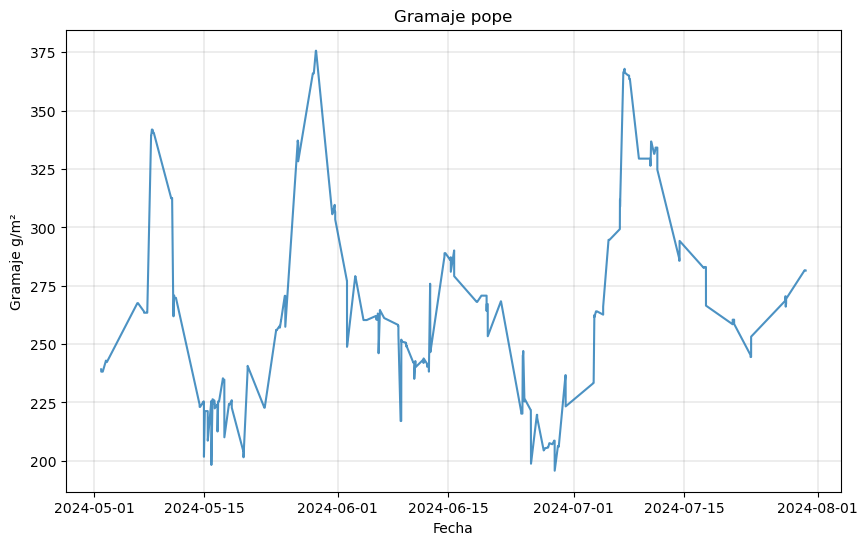

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(df_combinado_corte['Date'], df_combinado_corte['Gramaje_pope'], alpha=0.8)
plt.grid(True, linewidth=0.2, color='gray')
plt.title('Gramaje pope')
plt.xlabel('Fecha')
plt.ylabel('Gramaje g/m²')
plt.show()

#### interesa ver la variabilidad del gramaje por grado para identificar los con mayor variación, y así porder analizarlos

In [59]:
ls_grados = np.unique(df_combinado_corte['Grado'])
print(ls_grados)

['2C205B' '2C225B' '2C235M' '2C240B' '2C245C' '2C295C' '2C325M' '2F225M'
 '3C250B' '3C255C' '3C260M' '3C265C' '3C270B' '3C275M' '3C285C' '3C290B'
 '3C295M' '3C310C' '3C315B' '3C330C' '3C340B' '3C345C' '3C370B' '3C370C'
 '3C370M']


#### Creo un diccionario con los grados, cantidad de muestras, media y desviación estandar

In [366]:
dic_desv ={}

for i in range(len(ls_grados)):
    df = df_combinado_corte[df_combinado_corte['Grado'] == ls_grados[i]]
    a = ls_grados[i]
    b = round(np.std(df['Gramaje_pope']), 3)
    c = round(np.mean(df['Gramaje_pope']), 1)
    d = len(df['Gramaje_pope'])
    
    dic_desv[a]=[b, c, d]
    
print(dic_desv)

{'2C205B': [1.549, 206.6, 520], '2C225B': [4.804, 222.8, 1741], '2C235M': [1.039, 238.0, 17], '2C240B': [4.253, 232.8, 281], '2C245C': [2.282, 241.1, 923], '2C295C': [1.23, 286.0, 84], '2C325M': [5.041, 309.4, 5], '2F225M': [0.0, 222.7, 85], '3C250B': [17.524, 253.3, 325], '3C255C': [15.648, 238.3, 387], '3C260M': [7.419, 260.4, 375], '3C265C': [3.952, 261.2, 1495], '3C270B': [9.451, 265.6, 2307], '3C275M': [2.65, 269.8, 128], '3C285C': [12.935, 272.0, 149], '3C290B': [4.296, 285.2, 446], '3C295M': [0.007, 294.7, 206], '3C310C': [0.655, 306.4, 136], '3C315B': [23.786, 281.8, 433], '3C330C': [2.334, 330.8, 1478], '3C340B': [36.244, 310.7, 322], '3C345C': [0.944, 336.5, 76], '3C370B': [0.0, 340.6, 140], '3C370C': [3.234, 366.3, 681], '3C370M': [0.624, 311.7, 33]}


In [368]:
print('Grado   [std, media, valores]')
for i in range(len(ls_grados)):
    print(f' {ls_grados[i]} {dic_desv[ls_grados[i]]}')

Grado   [std, media, valores]
 2C205B [1.549, 206.6, 520]
 2C225B [4.804, 222.8, 1741]
 2C235M [1.039, 238.0, 17]
 2C240B [4.253, 232.8, 281]
 2C245C [2.282, 241.1, 923]
 2C295C [1.23, 286.0, 84]
 2C325M [5.041, 309.4, 5]
 2F225M [0.0, 222.7, 85]
 3C250B [17.524, 253.3, 325]
 3C255C [15.648, 238.3, 387]
 3C260M [7.419, 260.4, 375]
 3C265C [3.952, 261.2, 1495]
 3C270B [9.451, 265.6, 2307]
 3C275M [2.65, 269.8, 128]
 3C285C [12.935, 272.0, 149]
 3C290B [4.296, 285.2, 446]
 3C295M [0.007, 294.7, 206]
 3C310C [0.655, 306.4, 136]
 3C315B [23.786, 281.8, 433]
 3C330C [2.334, 330.8, 1478]
 3C340B [36.244, 310.7, 322]
 3C345C [0.944, 336.5, 76]
 3C370B [0.0, 340.6, 140]
 3C370C [3.234, 366.3, 681]
 3C370M [0.624, 311.7, 33]


In [370]:
dic_desv_ordenado = dict(sorted(dic_desv.items(), key=lambda item: item[1][0] ))

In [372]:
for key, value in dic_desv_ordenado.items():
    print(f"{key}: {value}")

2F225M: [0.0, 222.7, 85]
3C370B: [0.0, 340.6, 140]
3C295M: [0.007, 294.7, 206]
3C370M: [0.624, 311.7, 33]
3C310C: [0.655, 306.4, 136]
3C345C: [0.944, 336.5, 76]
2C235M: [1.039, 238.0, 17]
2C295C: [1.23, 286.0, 84]
2C205B: [1.549, 206.6, 520]
2C245C: [2.282, 241.1, 923]
3C330C: [2.334, 330.8, 1478]
3C275M: [2.65, 269.8, 128]
3C370C: [3.234, 366.3, 681]
3C265C: [3.952, 261.2, 1495]
2C240B: [4.253, 232.8, 281]
3C290B: [4.296, 285.2, 446]
2C225B: [4.804, 222.8, 1741]
2C325M: [5.041, 309.4, 5]
3C260M: [7.419, 260.4, 375]
3C270B: [9.451, 265.6, 2307]
3C285C: [12.935, 272.0, 149]
3C255C: [15.648, 238.3, 387]
3C250B: [17.524, 253.3, 325]
3C315B: [23.786, 281.8, 433]
3C340B: [36.244, 310.7, 322]


#### Los grados con mayor variabilidad necesitan un análisis para identificar correlaciones que expliquen esta variación. Se analizan los 5 grados con mayor variación: 3C340B, 3C315B, 3C250B, 3C255C, 3C285C